# Fourier Series 
The Fourier series enables us to represent $periodic$ functions as an infinite sum. Particularly, it represents functions as a sum of weighted $sin$ and $cos$ functions.

This is possible, since the sin and cos functions form a complete orthogonal set (*basis functions*). The Fourier series for a function $f(x)$ with a period of $2{\pi}$ is given by:

$$f(x) = \frac{a_0}{2} + \sum \limits _{n=1} ^{\infty}a_n \cos(nx) + \sum \limits _{n=1} ^{\infty}b_n \sin(nx)$$

where $a_n$ and $b_n$ are a set of coeffiecients.

## Fourier Coeffiecients
Using the orthogonality property of the cos and sin functions we can determine an expression for the coefficients of the Fourier Series. By integrating the Fourier Series over the interval [-${\pi}$,${\pi}$], we can determine an expression for $a_0$. Over this interval, the sums will vanish, as we are intergrating the sin and cos functions over a period. Thus, we are left with

$$\int_{-{\pi}}^{\pi} f(x)dx = \int_{-{\pi}}^{\pi}\frac{a_0}{2}dx$$

Therefore, by carrying out the integral we find the expression for $a_0$ to be

$$a_0 = \frac{1}{\pi} \int_{-{\pi}}^{\pi} f(x)dx $$

From this, its is clear that the $\frac{a_0}{2}$ term in the series represents the mean of the function $f(x)$ over the period. In order to determine the $a_n$ coefficients we must multiply the series by $\cos(mx)$, for a positive integer $m$, and integrate over the period. The series becomes

$$\int_{-{\pi}}^{\pi}f(x)\cos(mx)dx = \frac{a_0}{2}\int_{-{\pi}}^{\pi}\cos(mx)dx + \sum \limits _{n=1} ^{\infty}\int_{-{\pi}}^{\pi}a_n\cos(nx)\cos(mx)dx + \sum \limits _{n=1} ^{\infty}\int_{-{\pi}}^{\pi}b_n\sin(nx)\cos(mx)dx$$

Due to the orthogonality property of the $\sin$ and $\cos$ functions, the only term that does not vanish on the right-hand side is $\int_{-{\pi}}^{\pi}a_n\cos(nx)\cos(mx)dx$ for $m=n$. Solving for $a_n$ we get

$$a_n = \frac{1}{\pi} \int_{-{\pi}}^{\pi} f(x)\cos(nx)dx \,\,\,\,n=1, 2, ...$$

This is consistent with the expresion for $a_0$ for $n=0$. Thus the 1/2 factor included on the $a_0$ term is there to maintain this consistency between $a_0$ and $a_n$.

To determine the values of the $b_n$ coefficients we multiply by $\sin(mx)$. Similarly to the $a_n$ coefficients, due to the orthogonality property, the only term that does not vanish on the right-hand side is $\int_{-{\pi}}^{\pi}b_n\sin(nx)\sin(mx)dx$ for $m=n$. Thus, solving for $b_n$

$$b_n = \frac{1}{\pi} \int_{-{\pi}}^{\pi} f(x)\sin(nx)dx \,\,\,\,n=1, 2, ...$$

## Square Wave and Gibbs Phenomenon
Now that we have introduced the Fourier Series lets look at an example, the positive square wave. This is defined as

$$
f(x) = \left\{
    \begin{array}\\
        0 & \mbox{if } \ -{\pi} \leq x < 0 \\
        1 & \mbox{if } \ 0 < x < {\pi},\\
    \end{array}
\right.
$$

Lets plot this function.

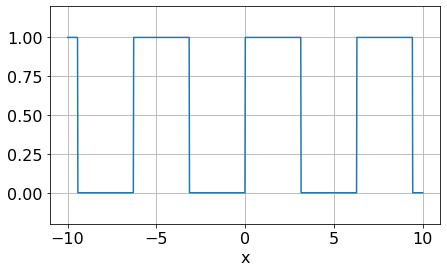

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'font.size' : 16 }
pylab.rcParams.update(params)

def square(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i]/(2*np.pi)) % 1 < 0.50:
            y[i] = 1.0
    return y

N = 1000
x = np.linspace(-10.0, 10.0, N)

plt.figure(figsize=(7,4))

ax=plt.subplot(1, 1, 1)
        
plt.plot(x, square(x))
ax.grid(True)
ax.set_ylim(-0.2, 1.2)
a = plt.xlabel('x')

Now lets try to express the square wave as a Fourier Series. Firstly we need to calculate the coefficients using the above expressions. Carrying out the calculations we find

$$a_0 = \frac{1}{\pi} \int_{0}^{\pi} dx = 1 $$

$$a_n = \frac{1}{\pi} \int_{0}^{\pi} \cos(nx)dx = 0, \,\,\,\,n\geq 1$$

$$
b_n = \frac{1}{\pi} \int_{0}^{\pi} \sin(nx)dx = \left\{
    \begin{array}\\
        \frac{2}{n{\pi}} & \mbox{if n is odd} \\
        0 & \mbox{if n is even}\\
    \end{array}
\right. 
$$

Now lets formulate the Fourier Series for the positive square wave. First lets define the Fourier Series and its terms

In [6]:
#define the cos and sin terms of the Fourier series
def cosTerm(n):
    # Always zero except for n=0
    if n==0: return 1.0
    return 0.

def sinTerm(n):

    if n%2: # n modulo 2 = 1 (True) then Odd
        ret = 2. / (n* np.pi)
    else:
        ret = 0.
    return ret

def fourier(n,x):
    #a_0 term, remember 1/2
    sum = cosTerm(0)/2.0 * np.ones(len(x))
    
    #all other terms
    for i in range(1, n+1):
        sum += sinTerm(i)*np.sin(i*x) + cosTerm(i)*np.cos(i*x)
    return sum

Now lets plot the Fourier Series for \\( n=10, n=50, n=100\\)

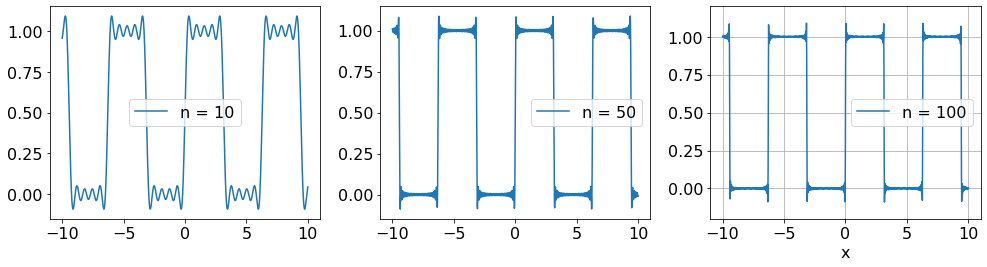

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(1, 3, 1)
plt.plot(x, fourier(10,x))
plt.legend(['n = 10'])

plt.subplot(1, 3, 2)
plt.plot(x, fourier(50,x))
plt.legend(['n = 50'])

plt.subplot(1, 3, 3)
plt.plot(x, fourier(100,x))
plt.legend(['n = 100'])

plt.xlabel('x')
plt.ylim([-0.2, 1.2])
plt.grid(True)
plt.tight_layout()
plt.show()

As expected, increasing the number of terms, $n$, results in the Fourier Series approaching closer to the true shape of the square wave. However, an overshoot (undershoot) and a ringing effect is evident on the plots. This occurs when a truncated Fourier Series is used to approximate a function with discontinuities, such as the function above. In fact, increasing the number of terms will not decrease the amplitude of the overshoot. The effect is present for all functions with discontinuities and is known as the *Gibbs phenomenon*.

So why do Gibbs phenomena occur? A discontinuity represents a change that takes place in zero time and thus contains infinite high frequencies. By approximating this with a truncated Fourier Series we are including only finite frequencies, which is not enough to properly describe the discontinuity, resulting in the ringing effect around the discontinuity, where the first ring has the largest amplitude.

## Fourier Series of Odd and Even Functions
Two classes of functions that will be of great use when dealing with Fourier Series are odd and even functions. In this section we will demonstrate how using the properties of odd and even functions can simplify the Fourier Series of a function.

For a symmetric interval around zero we have

$$f(x) = f(-x) \,\, \mbox{if } f \, \mbox{is} \,\mbox{even}$$
$$f(x) = -f(-x) \,\, \mbox{if } f \, \mbox{is} \,\mbox{odd}$$

From these definitions, it is clear that even functions are symmetric around the y axis, eg. $\cos(x)$ while odd functions are antisymmetric around the y axis eg. $\sin(x)$. The following properties of odd and even functions are very useful in Fourier analysis.
- The product of two odd functions is an even function, $o_1(x)o_2(x) = e(x)$.


- The product of two even functions is an even function, $e_1(x)e_2(x) = e(x)$.


- The product of an even and an odd function is an odd function, $e_1(x)o_1(x) = o(x)$.


- The integral of an odd function on a *symmetric* interval is zero, $\int_{-a}^{a} o(x)dx = 0$


- The integral of an even function on a *symmetric* interval is twice the integral of the postive part, $\int_{-a}^{a} e(x)dx = 2\int_{0}^{a} e(x)dx$

Since $\cos(nx)$ is even and $\sin(nx)$ is odd, depending on the nature of $f(x)$ we may be able to eliminate some terms from the Fourier series. Lets use the above example, the positive square wave. The square wave is an odd function, thus the term $f(x)\cos(nx)$  must be odd. Thus, looking at the expression for $a_n$ and the properties of odd functions, we can see that $a_n = 0$ for all $n > 0$, which agrees with what we have found before. Thus, the properties of odd and even functions can allow us to eliminate one of the infinite sums in the Fourier Series, making them very useful in Fourier analysis.

## Changing the Interval
A function need not be periodic around the [-${\pi}$,${\pi}$] interval, in order to be expressed as a Fourier Series. Through a simple change of variable we can express a periodic function across any interval as a Fourier Series. For a function $f(x)$ with a period $p=2L$, we need to scale the x-axis by a variable $u$ where,

$$u = \frac{{\pi}x}{L}$$

Taking into consideration a new function $g(u)$, where $g(u)=f(x)$, we can write the Fourier Series for $g(u)$ as

$$g(u) = \frac{a_0}{2} + \sum \limits _{n=1} ^{\infty}a_n \cos(nu) + \sum \limits _{n=1} ^{\infty}b_n \sin(nu)$$

Thus, by changing out variable back to $x$ we can write the Fourier Series of $f(x)$ as

$$f(x) = \frac{a_0}{2} + \sum \limits _{n=1} ^{\infty}a_n \cos(\frac{n{\pi}}{L}x) + \sum \limits _{n=1} ^{\infty}b_n \sin(\frac{n{\pi}}{L}x)$$

Using $\frac{du}{dx} = \frac{{\pi}}{L}$ we can determine the coefficients $a_0$, $a_n$ and $b_n$. These are given by

$$a_0 = \frac{1}{L} \int_{-L}^{L} f(x)dx $$

$$a_n = \frac{1}{L} \int_{-L}^{L} f(x)\cos(\frac{n{\pi}}{L}x)dx \,\,\,\,n=1, 2, ...$$

$$b_n = \frac{1}{L} \int_{-L}^{L} f(x)\sin(\frac{n{\pi}}{L}x)dx \,\,\,\,n=1, 2, ...$$

Using these expressions we can express periodic functions of any period as Fourier Series. 

## References:
Material used in this notebook was based on the Fourier Series lecture content of Maths Methods 2 module provided by the Earth Science and Engineering Department and on the "Fourier Transforms" course by professor Carlo Contaldi provided by the Physics Department.
